In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline
import pydotplus
from IPython.display import Image
import collections
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix,auc,roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
import scipy.stats as stats
from scipy.stats import chi2_contingency
import re
import datetime as dt
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

C:\Users\sumit\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
df = pd.read_excel('C:/Users/sumit/Sumit DATA/datasets/Project/Cleandata7.xlsx')

In [3]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,agreeableness,extraversion,nueroticism,openess_to_experience,Aggregate Mean Marks,Aggregate Max Marks,Aggregate Min Marks,GAP_after_Grad,GAP_in_Grad,Age
0,203097,420000,2012-06-01,2015-12-31,senior quality engineer,bangalore,Female,1990-02-19,84.3,State Board,...,0.8128,0.5269,1.35490,-0.4455,445.0,445,445,1,0,25
1,579905,500000,2013-09-01,2015-12-31,assistant manager,indore,Male,1989-10-04,85.4,CBSE,...,0.3789,1.2396,-0.10760,0.8637,466.0,466,466,1,1,26
2,810601,325000,2014-06-01,2015-12-31,systems engineer,chennai,Female,1992-08-03,85.0,CBSE,...,1.7109,0.1637,-0.86820,0.6721,395.0,395,395,0,0,23
3,267447,1100000,2011-07-01,2015-12-31,senior software engineer,gurgaon,Male,1989-12-05,85.6,CBSE,...,0.3448,-0.3440,-0.40780,-0.9194,615.0,615,615,0,0,26
4,343523,200000,2014-03-01,2015-03-01,get,manesar,Male,1991-02-27,78.0,CBSE,...,-0.2793,-1.0697,0.09163,-0.1295,233.0,233,233,2,0,24


In [4]:
from scipy import stats
import numpy as np
df = df[(np.abs(stats.zscore(df['Salary'])) < 3)]

In [5]:
df.corr()['Salary']

ID                      -0.316200
Salary                   1.000000
10percentage             0.274999
12graduation            -0.186857
12percentage             0.264188
CollegeID               -0.157779
collegeGPA               0.225736
CollegeCityID           -0.157779
GraduationYear          -0.260668
English                  0.254151
Logical                  0.247790
Quant                    0.353101
Domain                   0.224228
ComputerProgramming      0.294510
ElectronicsAndSemicon    0.114936
ComputerScience          0.201186
MechanicalEngg           0.253169
ElectricalEngg           0.274793
TelecomEngg              0.110847
CivilEngg                0.279326
conscientiousness       -0.063922
agreeableness            0.062280
extraversion            -0.030791
nueroticism             -0.059567
openess_to_experience   -0.008351
Aggregate Mean Marks     0.227374
Aggregate Max Marks      0.206631
Aggregate Min Marks      0.229495
GAP_after_Grad          -0.031487
GAP_in_Grad   

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3939 entries, 0 to 3978
Data columns (total 44 columns):
ID                       3939 non-null int64
Salary                   3939 non-null int64
DOJ                      3939 non-null datetime64[ns]
DOL                      3939 non-null datetime64[ns]
Designation              3939 non-null object
JobCity                  3483 non-null object
Gender                   3939 non-null object
DOB                      3939 non-null datetime64[ns]
10percentage             3939 non-null float64
10board                  3939 non-null object
12graduation             3939 non-null int64
12percentage             3939 non-null float64
12board                  3939 non-null object
CollegeID                3939 non-null int64
CollegeTier              3939 non-null object
Degree                   3939 non-null object
Specialization           3939 non-null object
collegeGPA               3939 non-null float64
CollegeCityID            3939 non-null int

In [7]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Aggregate Mean Marks', 'Aggregate Max Marks', 'Aggregate Min Marks',
       'GAP_after_Grad', 'GAP_in_Grad', 'Age'],
      dtype='object')

In [8]:
df = df.drop(['ID', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'DOB', 'CollegeID', 'CollegeCityID', 'CollegeCityTier',
       'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg','Aggregate Min Marks','Aggregate Max Marks','GAP_after_Grad'],axis=1)

In [9]:
df.head().T

,0,1,2,4,5
Salary,420000,500000,325000,200000,300000
Gender,Female,Male,Female,Male,Male
10percentage,84.3,85.4,85,78,89.92
10board,State Board,CBSE,CBSE,CBSE,State Board
12graduation,2007,2007,2010,2008,2010
12percentage,95.8,85,68.2,76.8,87
12board,State Board,CBSE,CBSE,CBSE,State Board
CollegeTier,Average College,Average College,Average College,Average College,Average College
Degree,B.Tech/B.E.,B.Tech/B.E.,B.Tech/B.E.,B.Tech/B.E.,B.Tech/B.E.
Specialization,computer engineering,electronics and communication engineering,information technology,electronics and communication engineering,electronics and communication engineering


In [10]:
df.head()

,Salary,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,...,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Aggregate Mean Marks,GAP_in_Grad,Age
0,420000,Female,84.30,State Board,2007,95.8,State Board,Average College,B.Tech/B.E.,computer engineering,...,525,0.635979,0.9737,0.8128,0.5269,1.35490,-0.4455,445.0,0,25
1,500000,Male,85.40,CBSE,2007,85.0,CBSE,Average College,B.Tech/B.E.,electronics and communication engineering,...,780,0.960603,-0.7335,0.3789,1.2396,-0.10760,0.8637,466.0,1,26
2,325000,Female,85.00,CBSE,2010,68.2,CBSE,Average College,B.Tech/B.E.,information technology,...,370,0.450877,0.2718,1.7109,0.1637,-0.86820,0.6721,395.0,0,23
4,200000,Male,78.00,CBSE,2008,76.8,CBSE,Average College,B.Tech/B.E.,electronics and communication engineering,...,465,0.124502,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,233.0,0,24
5,300000,Male,89.92,State Board,2010,87.0,State Board,Average College,B.Tech/B.E.,electronics and communication engineering,...,620,0.000000,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608,526.0,0,23


In [11]:
df.groupby('12graduation').count()['Salary']

12graduation
2003      24
2004      68
2005     155
2006     399
2007     521
2008     932
2009    1047
2010     738
2011      44
2012      10
2013       1
Name: Salary, dtype: int64

In [12]:
df['12graduation'].unique()

array([2007, 2010, 2008, 2009, 2006, 2011, 2005, 2004, 2012, 2003, 2013],
      dtype=int64)

In [13]:
from sklearn.preprocessing import LabelEncoder
gender_label = LabelEncoder()
df['Gender'] = gender_label.fit_transform(df['Gender'])
board10 = LabelEncoder()
df['10board'] = board10.fit_transform(df['10board'])
board12 = LabelEncoder()
df['12board'] = board12.fit_transform(df['12board'])
deg = LabelEncoder()
df['Degree'] = deg.fit_transform(df['Degree'])
sep = LabelEncoder()
df['Specialization'] = sep.fit_transform(df['Specialization'])
clostate = LabelEncoder()
df['CollegeState'] = clostate.fit_transform(df['CollegeState'])
wegrad = LabelEncoder()
df['12graduation'] = wegrad.fit_transform(df['12graduation'])
wegradqw = LabelEncoder()
df['GraduationYear'] = wegradqw.fit_transform(df['GraduationYear'])
qwerty = LabelEncoder()
df['CollegeTier'] = qwerty.fit_transform(df['CollegeTier'])

In [14]:
df['12graduation'].unique()

array([ 4,  7,  5,  6,  3,  8,  2,  1,  9,  0, 10], dtype=int64)

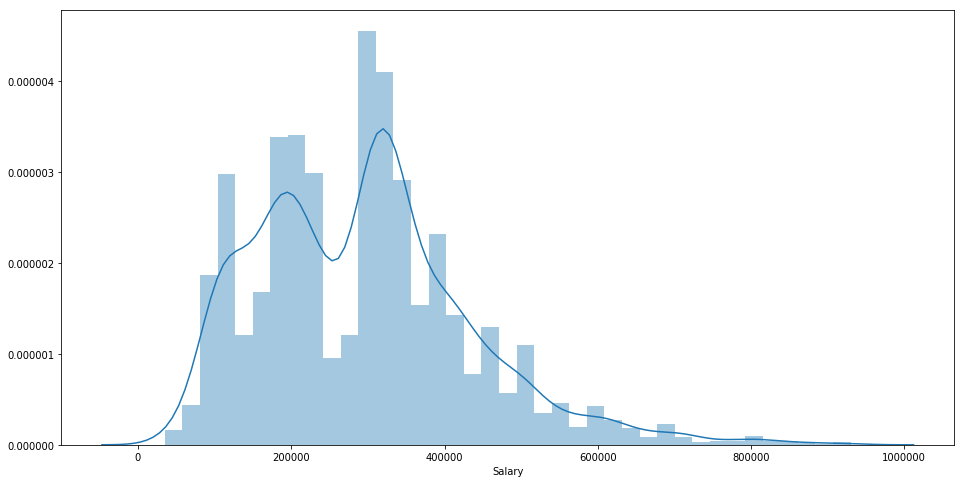

In [15]:
plt.figure(figsize=(16,8))
sns.distplot(df['Salary'])

In [16]:
df1 = df.copy()

In [17]:
df1.columns

Index(['Salary', 'Gender', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeTier', 'Degree', 'Specialization',
       'collegeGPA', 'CollegeState', 'GraduationYear', 'English', 'Logical',
       'Quant', 'Domain', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Aggregate Mean Marks',
       'GAP_in_Grad', 'Age'],
      dtype='object')

In [18]:
x = df1
x.head()
from scipy.stats import zscore

In [19]:
x = x.apply(zscore)
x.head()

,Salary,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,...,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Aggregate Mean Marks,GAP_in_Grad,Age
0,0.902538,-1.777484,0.645059,0.644250,-0.721635,1.940294,0.640649,-0.279807,-0.274007,-1.069560,...,0.096370,0.214417,0.981170,0.709296,0.552291,1.507413,-0.306493,0.298663,-0.542174,0.279814
1,1.474561,0.562593,0.757339,-1.236225,-0.721635,0.954452,-1.233482,-0.279807,-0.274007,0.095949,...,2.191434,1.287484,-0.681278,0.247907,1.302023,0.058032,0.993758,0.474311,0.853658,0.871433
2,0.223260,-1.777484,0.716510,-1.236225,1.189089,-0.579081,-1.233482,-0.279807,-0.274007,1.367414,...,-1.177101,-0.397449,0.297669,1.664293,0.170219,-0.695745,0.803467,-0.119547,-0.542174,-0.903424
4,-0.670527,0.562593,0.001999,-1.236225,-0.084727,0.205942,-1.233482,-0.279807,-0.274007,0.095949,...,-0.396586,-1.476301,-0.824912,-0.451992,-1.127270,0.255475,0.007347,-1.474546,-0.542174,-0.311805
5,0.044503,0.562593,1.218709,0.644250,1.189089,1.137015,0.640649,-0.279807,-0.274007,0.095949,...,0.876884,-1.887850,-0.261771,-0.814383,-2.416659,-0.570182,-0.718954,0.976162,-0.542174,-0.903424


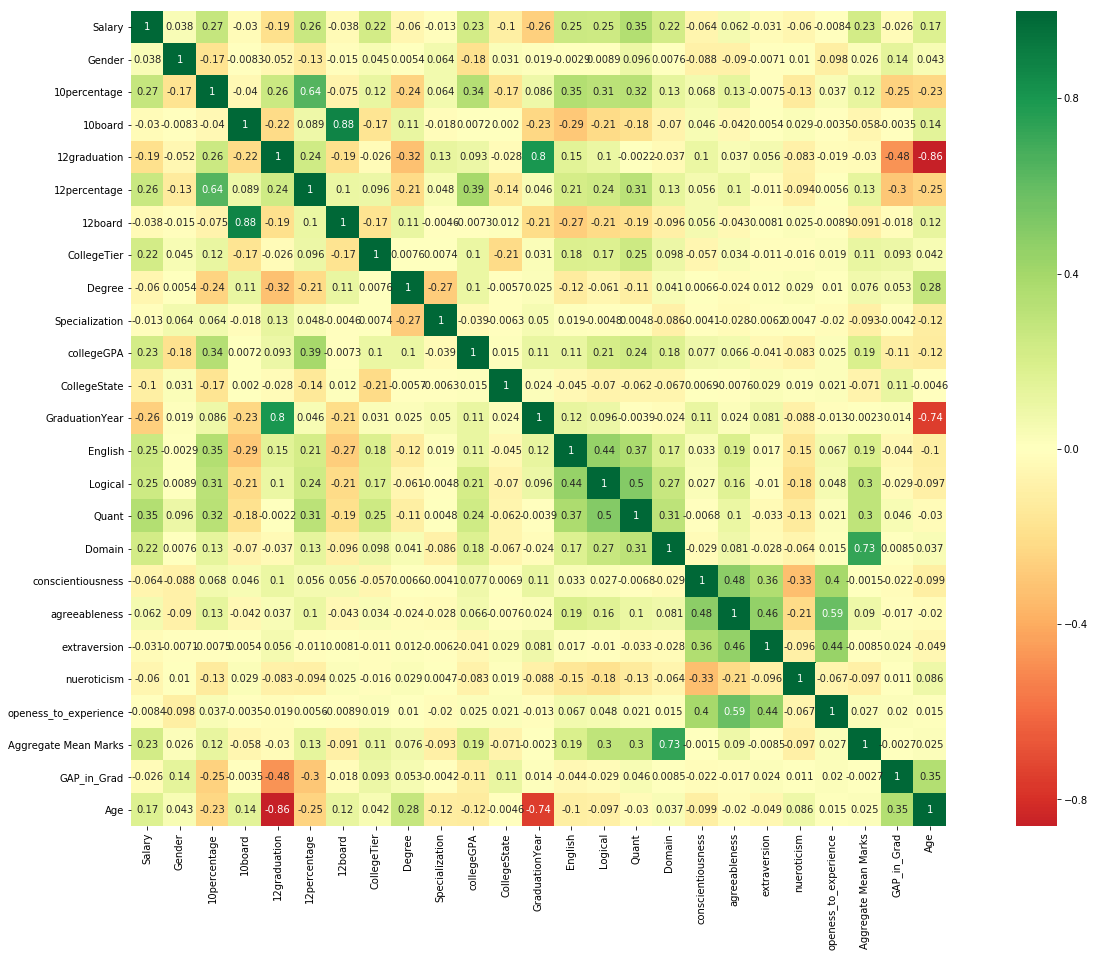

In [20]:
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(df.corr(), annot=True, center=0, square=True, cmap='RdYlGn', ax=ax)
plt.show()

### Multiclass Classification

In [21]:
df2 = df.copy()

In [22]:
def sal(x):
    if x >= 600000:
        return 'High Package'
    elif x >= 350000  and x < 600000:
        return 'Medium Package'
    else:
        return 'Low Package'  

In [23]:
df2['Salary'] = df2['Salary'].apply(sal)

In [24]:
sal = LabelEncoder()
df2['Salary'] = sal.fit_transform(df2['Salary'])

In [25]:
sal.classes_

array(['High Package', 'Low Package', 'Medium Package'], dtype=object)

In [26]:
df2['Salary'].unique()

array([2, 1, 0], dtype=int64)

In [27]:
df2['Salary'].value_counts()

1    2741
2    1048
0     150
Name: Salary, dtype: int64

# Modelling

In [28]:
x = df2[['Gender', '10board', '12graduation', '12board', 'CollegeTier', 'Degree', 'Specialization',
       'CollegeState', 'GraduationYear','GAP_in_Grad','Age', 'Logical','Quant', 'Domain','English','Aggregate Mean Marks','10percentage','12percentage','collegeGPA','conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']]
y = df2[['Salary']]
sm = SMOTE(random_state=0)
x,y = sm.fit_resample(x, y)
x = pd.DataFrame(x)
y = pd.DataFrame(y)
y['Salary'] = y[[0]] 
x[['Gender', '10board', '12graduation', '12board', 'CollegeTier', 'Degree', 'Specialization',
       'CollegeState', 'GraduationYear','GAP_in_Grad','Age', 'Logical','Quant', 'Domain','English','Aggregate Mean Marks','10percentage','12percentage','collegeGPA','conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']] = x[np.arange(0,24)]
x = x.drop(np.arange(0,24),axis = 1)
y = y.drop(0,axis = 1)

In [29]:
y['Salary'].value_counts()

2    2741
1    2741
0    2741
Name: Salary, dtype: int64

In [30]:
print(y.shape,x.shape)

(8223, 1) (8223, 24)


In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

[0.02791874 0.01750701 0.15163554 0.02192374 0.12764553 0.00086023
 0.00688723 0.0154266  0.17690057 0.00500053 0.06430545 0.02815731
 0.08407438 0.02864522 0.0566473  0.0401671  0.03499941 0.04812123
 0.0228632  0.01880753 0.00546    0.00531868 0.00488521 0.00584227]


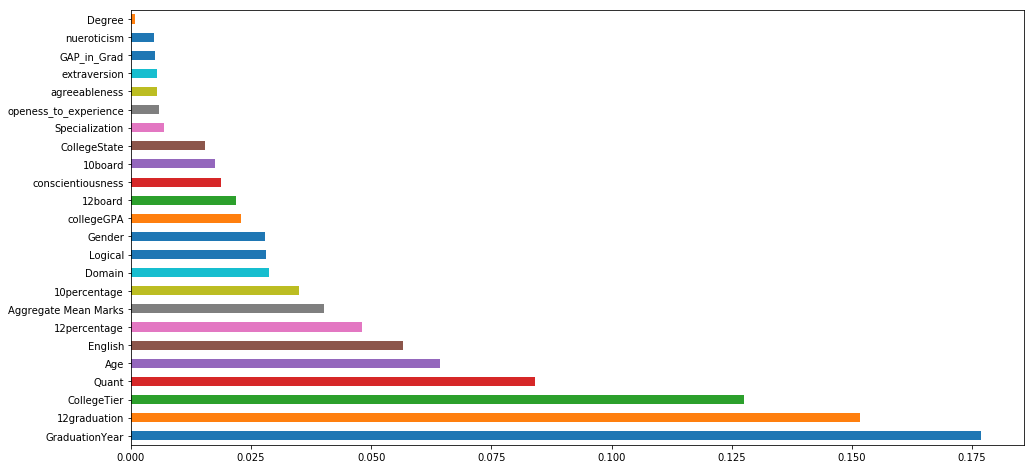

0.7307157748436414 0.7109850020267532


In [32]:
model = RandomForestClassifier(n_estimators=30,max_depth=5,random_state=0)
model.fit(x_train,y_train)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
plt.figure(figsize=(16,8))
feat_importances.nlargest(30).plot(kind='barh')
plt.show()
print(model.score(x_train,y_train),model.score(x_test,y_test))

In [33]:
df2.head().T

,0,1,2,4,5
Salary,2.000000,2.000000,1.000000,1.000000,1.0000
Gender,0.000000,1.000000,0.000000,1.000000,1.0000
10percentage,84.300000,85.400000,85.000000,78.000000,89.9200
10board,2.000000,0.000000,0.000000,0.000000,2.0000
12graduation,4.000000,4.000000,7.000000,5.000000,7.0000
12percentage,95.800000,85.000000,68.200000,76.800000,87.0000
12board,2.000000,0.000000,0.000000,0.000000,2.0000
CollegeTier,0.000000,0.000000,0.000000,0.000000,0.0000
Degree,0.000000,0.000000,0.000000,0.000000,0.0000
Specialization,10.000000,21.000000,33.000000,21.000000,21.0000


In [34]:
df2.columns

Index(['Salary', 'Gender', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeTier', 'Degree', 'Specialization',
       'collegeGPA', 'CollegeState', 'GraduationYear', 'English', 'Logical',
       'Quant', 'Domain', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Aggregate Mean Marks',
       'GAP_in_Grad', 'Age'],
      dtype='object')

In [35]:
from statsmodels.formula.api import MNLogit,OLS
x_cont = x[['Age', 'Logical','Quant', 'Domain','English','Aggregate Mean Marks','10percentage','12percentage','collegeGPA','conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']]
#sc = StandardScaler()
#x = sc.fit_transform(x)
result = MNLogit(y,x_cont)
model = result.fit()
model.summary()

Optimization terminated successfully.
         Current function value: 1.019873
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                 Salary   No. Observations:                 8223
Model:                        MNLogit   Df Residuals:                     8195
Method:                           MLE   Df Model:                           26
Date:                Mon, 19 Aug 2019   Pseudo R-squ.:                 0.07167
Time:                        22:17:07   Log-Likelihood:                -8386.4
converged:                       True   LL-Null:                       -9033.9
                                        LLR p-value:                7.411e-257
=========================================================================================
             Salary=1       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Age                       0.0266      0.011      2.521      0.012       0.006       0.047
Logical                   0.0018      0.000      4.166      0.000       0.001       0.003
Quant                    -0.0059      0.000    -17.932      0.000      -0.007      -0.005
Domain                   -1.9197      0.165    -11.662      0.000      -2.242      -1.597
English                  -0.0013      0.000     -3.742      0.000      -0.002      -0.001
Aggregate Mean Marks      0.0015      0.000      3.815      0.000       0.001       0.002
10percentage              0.0145      0.005      3.128      0.002       0.005       0.024
12percentage             -0.0058      0.004     -1.456      0.145      -0.014       0.002
collegeGPA                0.3042      0.043      6.999      0.000       0.219       0.389
conscientiousness         0.4837      0.038     12.746      0.000       0.409       0.558
agreeableness            -0.3597      0.049     -7.404      0.000      -0.455      -0.264
extraversion              0.2274      0.040      5.716      0.000       0.149       0.305
nueroticism               0.0776      0.036      2.160      0.031       0.007       0.148
openess_to_experience     0.0577      0.042      1.365      0.172      -0.025       0.140
-----------------------------------------------------------------------------------------
             Salary=2       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Age                      -0.0166      0.010     -1.640      0.101      -0.036       0.003
Logical                   0.0005      0.000      1.291      0.197      -0.000       0.001
Quant                    -0.0025      0.000     -7.922      0.000      -0.003      -0.002
Domain                   -1.1196      0.161     -6.936      0.000      -1.436      -0.803
English                  -0.0020      0.000     -6.247      0.000      -0.003      -0.001
Aggregate Mean Marks      0.0016      0.000      4.466      0.000       0.001       0.002
10percentage              0.0196      0.005      4.336      0.000       0.011       0.028
12percentage              0.0058      0.004      1.503      0.133      -0.002       0.013
collegeGPA                0.0924      0.041      2.231      0.026       0.011       0.174
conscientiousness         0.2662      0.035      7.609      0.000       0.198       0.335
agreeableness            -0.0803      0.046     -1.746      0.081      -0.171       0.010
extraversion              0.1158      0.037      3.127      0.002       0.043       0.188
nueroticism               0.0636      0.034      1.857      0.063      -0.004       0.131
openess_to_experience    -0.0495      0.040     -1.228      0.219      -0.128       0.029
=========================================================================================
"""

In [36]:
from sklearn.feature_selection import chi2
x_cat = x[['Gender', '10board', '12graduation', '12board', 'CollegeTier', 'Degree', 'Specialization',
       'CollegeState', 'GraduationYear','GAP_in_Grad']]
chi_score,p_value = chi2(x_cat,y)
pvalue = []
for i in p_value:
    a = round(i,10)
    pvalue.append(a)
PTable_Chi2 = pd.DataFrame({'Features':x_cat.columns,'P value':pvalue})
PTable_Chi2

,Features,P value
0,Gender,3.238200e-06
1,10board,2.263278e-03
2,12graduation,0.000000e+00
3,12board,4.640874e-01
4,CollegeTier,0.000000e+00
5,Degree,4.220000e-08
6,Specialization,1.167681e-04
7,CollegeState,0.000000e+00
8,GraduationYear,0.000000e+00
9,GAP_in_Grad,5.987000e-07


In [37]:
x_cont = x[['Age', 'Logical','Quant', 'Domain','English','Aggregate Mean Marks','10percentage','12percentage','collegeGPA','conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']]
sc = StandardScaler()
x_cont = sc.fit_transform(x_cont)
pca = PCA(n_components=12)
pca.fit(x_cont)
X_pca = pd.DataFrame(pca.transform(x_cont))

In [38]:
X_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.168826,-0.557419,0.856063,-1.326446,-0.963587,0.615638,-0.050946,-0.184842,-0.090358,1.663288,-1.402597,-0.106926
1,-2.516523,-0.539398,-0.839659,0.618375,-1.735210,-0.344097,-0.168391,-1.555057,-0.490036,-0.188925,0.830699,0.472871
2,0.031061,-2.156170,0.698427,1.386019,-0.285730,0.546450,-0.847771,1.107259,1.079456,-0.712712,-0.499698,-0.247729
3,0.892009,0.895442,2.016138,1.029584,-0.708915,-0.614865,0.753119,0.819303,0.267905,-0.648947,-0.903107,0.497074
4,-1.033953,1.960248,2.406649,0.566122,0.937711,-0.389807,0.005056,1.276318,-0.501231,-0.125742,0.206813,0.074068


In [39]:
pca.components_

array([[ 0.10235977, -0.37953004, -0.38335649, -0.30610081, -0.33490498,
        -0.30282415, -0.3670858 , -0.34512095, -0.30062019, -0.05261681,
        -0.16398863,  0.0223743 ,  0.14579842, -0.0728297 ],
       [ 0.02277502,  0.07622511,  0.09245811,  0.10143022,  0.04364976,
         0.09382011,  0.02621043,  0.0541511 ,  0.00092842, -0.4814207 ,
        -0.48966724, -0.45853686,  0.24092495, -0.46975095],
       [-0.37710051, -0.03374178, -0.05596894, -0.51529349,  0.05581788,
        -0.51852113,  0.36919607,  0.3610909 ,  0.14603051,  0.06841251,
        -0.08444968, -0.08095551, -0.02120692, -0.09583407],
       [-0.24942881,  0.38434087,  0.09415509, -0.15961935,  0.49807898,
        -0.10739572, -0.18570641, -0.33039711, -0.50177255,  0.00380044,
         0.03648768, -0.05766742, -0.28483201, -0.12199145],
       [-0.16212246, -0.11737548, -0.09370874,  0.14300827, -0.284112  ,
         0.13444474, -0.08221794, -0.00369957,  0.14762388,  0.31001527,
        -0.20148367, -0.11

In [40]:
pca.explained_variance_

array([3.39940474, 2.3502928 , 1.61820182, 1.02158094, 0.97005001,
       0.90252346, 0.69746464, 0.61303577, 0.5333862 , 0.50695039,
       0.46457857, 0.38543511])

In [41]:
pca_var = pca.explained_variance_ratio_
pca_var = pd.DataFrame(pca_var*100)
pca_var.sum()

0    96.151909
dtype: float64

In [42]:
x = x.drop(['Age', 'Logical','Quant', 'Domain','English','Aggregate Mean Marks','10percentage','12percentage','collegeGPA','conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],axis = 1)

In [43]:
x['PC1'] = X_pca[0]
x['PC2'] = X_pca[1]
x['PC3'] = X_pca[2]
x['PC4'] = X_pca[3]
x['PC5'] = X_pca[4]
x['PC6'] = X_pca[5]
x['PC7'] = X_pca[6]
x['PC8'] = X_pca[7]
x['PC9'] = X_pca[8]
x['PC10'] = X_pca[9]
x['PC11'] = X_pca[10]
x['PC12'] = X_pca[11]

In [44]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 22 columns):
Gender            8223 non-null float64
10board           8223 non-null float64
12graduation      8223 non-null float64
12board           8223 non-null float64
CollegeTier       8223 non-null float64
Degree            8223 non-null float64
Specialization    8223 non-null float64
CollegeState      8223 non-null float64
GraduationYear    8223 non-null float64
GAP_in_Grad       8223 non-null float64
PC1               8223 non-null float64
PC2               8223 non-null float64
PC3               8223 non-null float64
PC4               8223 non-null float64
PC5               8223 non-null float64
PC6               8223 non-null float64
PC7               8223 non-null float64
PC8               8223 non-null float64
PC9               8223 non-null float64
PC10              8223 non-null float64
PC11              8223 non-null float64
PC12              8223 non-null float64
dtypes: float

In [45]:
x.head()

,Gender,10board,12graduation,12board,CollegeTier,Degree,Specialization,CollegeState,GraduationYear,GAP_in_Grad,...,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,0.0,2.0,4.0,2.0,0.0,0.0,10.0,0.0,3.0,0.0,...,0.856063,-1.326446,-0.963587,0.615638,-0.050946,-0.184842,-0.090358,1.663288,-1.402597,-0.106926
1,1.0,0.0,4.0,0.0,0.0,0.0,21.0,13.0,4.0,1.0,...,-0.839659,0.618375,-1.735210,-0.344097,-0.168391,-1.555057,-0.490036,-0.188925,0.830699,0.472871
2,0.0,0.0,7.0,0.0,0.0,0.0,33.0,23.0,6.0,0.0,...,0.698427,1.386019,-0.285730,0.546450,-0.847771,1.107259,1.079456,-0.712712,-0.499698,-0.247729
3,1.0,0.0,5.0,0.0,0.0,0.0,21.0,23.0,4.0,0.0,...,2.016138,1.029584,-0.708915,-0.614865,0.753119,0.819303,0.267905,-0.648947,-0.903107,0.497074
4,1.0,2.0,7.0,2.0,0.0,0.0,21.0,11.0,6.0,0.0,...,2.406649,0.566122,0.937711,-0.389807,0.005056,1.276318,-0.501231,-0.125742,0.206813,0.074068


In [46]:
x.columns

Index(['Gender', '10board', '12graduation', '12board', 'CollegeTier', 'Degree',
       'Specialization', 'CollegeState', 'GraduationYear', 'GAP_in_Grad',
       'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12'],
      dtype='object')

In [47]:
y.columns

Index(['Salary'], dtype='object')

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test) 

In [49]:
xgb = XGBClassifier(learning_rate = .1,n_estimator=20)
xgb.fit(x_train,y_train)
print(f'{xgb.score(x_train,y_train)} , {xgb.score(x_test,y_test)}')
print('***'*20)
y_pred2 = xgb.predict(x_test)
print(confusion_matrix(y_test,y_pred2))
print('***'*20)
print(classification_report(y_test,y_pred2))

0.8174079221681724 , 0.767328739359546
************************************************************
[[721  17 106]
 [ 17 686 111]
 [160 163 486]]
************************************************************
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       844
           1       0.79      0.84      0.82       814
           2       0.69      0.60      0.64       809

    accuracy                           0.77      2467
   macro avg       0.76      0.77      0.76      2467
weighted avg       0.76      0.77      0.76      2467



In [50]:
model1 = RandomForestClassifier(n_estimators=21,criterion='entropy',random_state=0)
model1 = AdaBoostClassifier(base_estimator=model1,n_estimators=80,random_state=0)
model1.fit(x_train,y_train)
print(model1.score(x_train,y_train),model1.score(x_test,y_test))
print('***'*20)
y_pred = model1.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print('***'*20)
print(classification_report(y_test,y_pred))

0.9994788047255038 0.9039319010944467
************************************************************
[[830   1  13]
 [  1 704 109]
 [  4 109 696]]
************************************************************
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       844
           1       0.86      0.86      0.86       814
           2       0.85      0.86      0.86       809

    accuracy                           0.90      2467
   macro avg       0.90      0.90      0.90      2467
weighted avg       0.90      0.90      0.90      2467



In [ ]:
#Logistic Regression
model1=LogisticRegression()
model1_bagged = BaggingClassifier(base_estimator=model1,n_estimators=7,random_state=0)
model1_ADAboost = AdaBoostClassifier(base_estimator=model1,n_estimators=50,random_state=0)

#K-neighbors
model2=KNeighborsClassifier(n_neighbors=3,weights = 'distance')
model2_bagged = BaggingClassifier(base_estimator=model2,n_estimators=3,random_state=0)

#Gausian NB
model3= GaussianNB()
model3_bagged = BaggingClassifier(base_estimator=model3,n_estimators=7,random_state=0)
model3_ADAboost = AdaBoostClassifier(base_estimator=model3,n_estimators=50,random_state=0)

#Random Forest
model4 = RandomForestClassifier(n_estimators=21,criterion='entropy',random_state=0)
model4_ADAboost = AdaBoostClassifier(base_estimator=model4,n_estimators=50,random_state=0)

#Decision Tree
model5_bagged = BaggingClassifier(n_estimators=10,random_state=0)  
model5_Gradient = GradientBoostingClassifier(n_estimators=150,random_state = 0)

kf=KFold(n_splits=4,shuffle=True,random_state=0)
for model,name in zip([model1,model1_bagged,model1_ADAboost,model2,model2_bagged,model3,model3_bagged,model3_ADAboost,model4,model4_ADAboost,model5_bagged,model5_Gradient],
                      ['LR','LR_Bag','LR_Boost','KN','KN_Bag','NB','NB_Bag','NB_Boost','RF','RF_Boost','DT_Bag','DT_Boost']):
    k=0
    recall = np.zeros((3,4))
    prec = np.zeros((3,4))
    fscore = np.zeros((3,4))
    for train,test in kf.split(x,y):
        x_train,x_test=x.iloc[train,:],x.iloc[test,:]
        y_train,y_test=y.iloc[train],y.iloc[test]
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        cm = confusion_matrix(y_test,y_pred)
        for i in np.arange(0,3):
            recall[i,k] = cm[i,i]/cm[i,:].sum()
        for i in np.arange(0,3):
            prec[i,k] = cm[i,i]/cm[:,i].sum()
        k=k+1
    for row in np.arange(0,3):
        for col in np.arange(0,4):
            fscore[row,col] = 2*(recall[row,col]*prec[row,col])/(recall[row,col]+prec[row,col])
    print('f1_weighted for class1: %0.02f (+/- %0.5f) [%s]' % (np.mean(fscore[0,:]), np.var(fscore[0,:],ddof = 1),name ))
    print('f1_weighted for class2: %0.02f (+/- %0.5f) [%s]' % (np.mean(fscore[1,:]), np.var(fscore[1,:],ddof = 1),name ))
    print('f1_weighted for class3: %0.02f (+/- %0.5f) [%s]' % (np.mean(fscore[2,:]), np.var(fscore[2,:],ddof = 1),name ))

In [ ]:
#Logistic Regression
model1=LogisticRegression()
model1_bagged = BaggingClassifier(base_estimator=model1,n_estimators=7,random_state=0)
model1_ADAboost = AdaBoostClassifier(base_estimator=model1,n_estimators=50,random_state=0)

#K-neighbors
model2=KNeighborsClassifier(n_neighbors=3,weights = 'distance')
model2_bagged = BaggingClassifier(base_estimator=model2,n_estimators=3,random_state=0)

#Random Forest
model4 = RandomForestClassifier(n_estimators=21,criterion='entropy',random_state=0)
model4_ADAboost = AdaBoostClassifier(base_estimator=model4,n_estimators=50,random_state=0)

#Decision Tree
model5_bagged = BaggingClassifier(n_estimators=10,random_state=0)  
model5_Gradient = GradientBoostingClassifier(n_estimators=150,random_state = 0)

kf=KFold(n_splits=4,shuffle=True,random_state=0)
for model,name in zip([model1,model1_bagged,model1_ADAboost,model2,model2_bagged,model3,model3_bagged,model3_ADAboost,model4,model4_ADAboost,model5_bagged,model5_Gradient],
                      ['LR','LR_Bag','LR_Boost','KN','KN_Bag','NB','NB_Bag','NB_Boost','RF','RF_Boost','DT_Bag','DT_Boost']):
    k=0
    recall = np.zeros((3,4))
    prec = np.zeros((3,4))
    fscore = np.zeros((3,4))
    for train,test in kf.split(x,y):
        x_train,x_test=x.iloc[train,:],x.iloc[test,:]
        y_train,y_test=y.iloc[train],y.iloc[test]
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        cm = confusion_matrix(y_test,y_pred)
        for i in np.arange(0,3):
            recall[i,k] = cm[i,i]/cm[i,:].sum()
        for i in np.arange(0,3):
            prec[i,k] = cm[i,i]/cm[:,i].sum()
        k=k+1
    for row in np.arange(0,3):
        for col in np.arange(0,4):
            fscore[row,col] = 2*(recall[row,col]*prec[row,col])/(recall[row,col]+prec[row,col])
    m1 = np.mean(fscore[0,:])
    m2 = np.mean(fscore[1,:])
    m3 = np.mean(fscore[2,:])
    v1 = np.var(fscore[0,:],ddof = 1)
    v2 = np.var(fscore[1,:],ddof = 1)
    v3 = np.var(fscore[2,:],ddof = 1)
    m = np.mean([m1,m2,m3])
    v = np.var([v1,v2,v3],ddof = 1)
    print("[%s]:mean = %0.02f variance = (+/- %0.5f)"% (name,m,v))

### Final Model Prediction

In [ ]:
df_test = pd.read_excel('C:/Users/sumit/Sumit DATA/datasets/Project/Cleantestdata1.xlsx')

In [ ]:
df_test.T

In [ ]:
x_cont = df_test[['Age', 'Logical','Quant', 'Domain','English','Aggregate Mean Marks','10percentage','12percentage','collegeGPA','conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']]
sc = StandardScaler()
x_cont = sc.fit_transform(x_cont)
pca = PCA(n_components=12)
pca.fit(x_cont)
X_pca_test = pd.DataFrame(pca.transform(x_cont))

In [ ]:
X_pca_test.head()

In [ ]:
df_test = df_test.drop(['Age', 'Logical','Quant', 'Domain','English','Aggregate Mean Marks','10percentage','12percentage','collegeGPA','conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],axis = 1)

In [ ]:
df_test['PC1'] = X_pca_test[0]
df_test['PC2'] = X_pca_test[1]
df_test['PC3'] = X_pca_test[2]
df_test['PC4'] = X_pca_test[3]
df_test['PC5'] = X_pca_test[4]
df_test['PC6'] = X_pca_test[5]
df_test['PC7'] = X_pca_test[6]
df_test['PC8'] = X_pca_test[7]
df_test['PC9'] = X_pca_test[8]
df_test['PC10'] = X_pca_test[9]
df_test['PC11'] = X_pca_test[10]
df_test['PC12'] = X_pca_test[11]

In [ ]:
x.columns

In [ ]:
x_train = x[['Gender', '10board', '12graduation', '12board', 'CollegeTier', 'Degree',
       'Specialization', 'CollegeState', 'GraduationYear', 'GAP_in_Grad',
       'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12']]
x_test = df_test[['Gender', '10board', '12graduation', '12board', 'CollegeTier', 'Degree',
       'Specialization', 'CollegeState', 'GraduationYear', 'GAP_in_Grad',
       'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12']]
y_train = df[['Salary']]

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
log = LogisticRegression(multi_class='multinomial',solver='newton-cg')
log.fit(x_train,y_train)

In [ ]:
log.score(x_train,y_train)

In [ ]:
y_pred = pd.Series(log.predict(df_test))

In [ ]:
y_pred.unique()